In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay
from statistics import stdev
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Reading the Data
import pandas as pd
data = pd.read_csv('diabetesprediction.csv')
data.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
#Length informations about our Data
row_count = len(data)
print(f'The DataFrame has {row_count} rows.')
samples, features = data.shape
print('Number Of Samples: ', samples)
print('Number Of Features: ', features)

The DataFrame has 100000 rows.
Number Of Samples:  100000
Number Of Features:  9


In [4]:
#Data Shape Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
#Data Cleansing
data.duplicated().sum()

3854

In [6]:
data = data.drop_duplicates()

In [7]:
#Checking the empty data
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

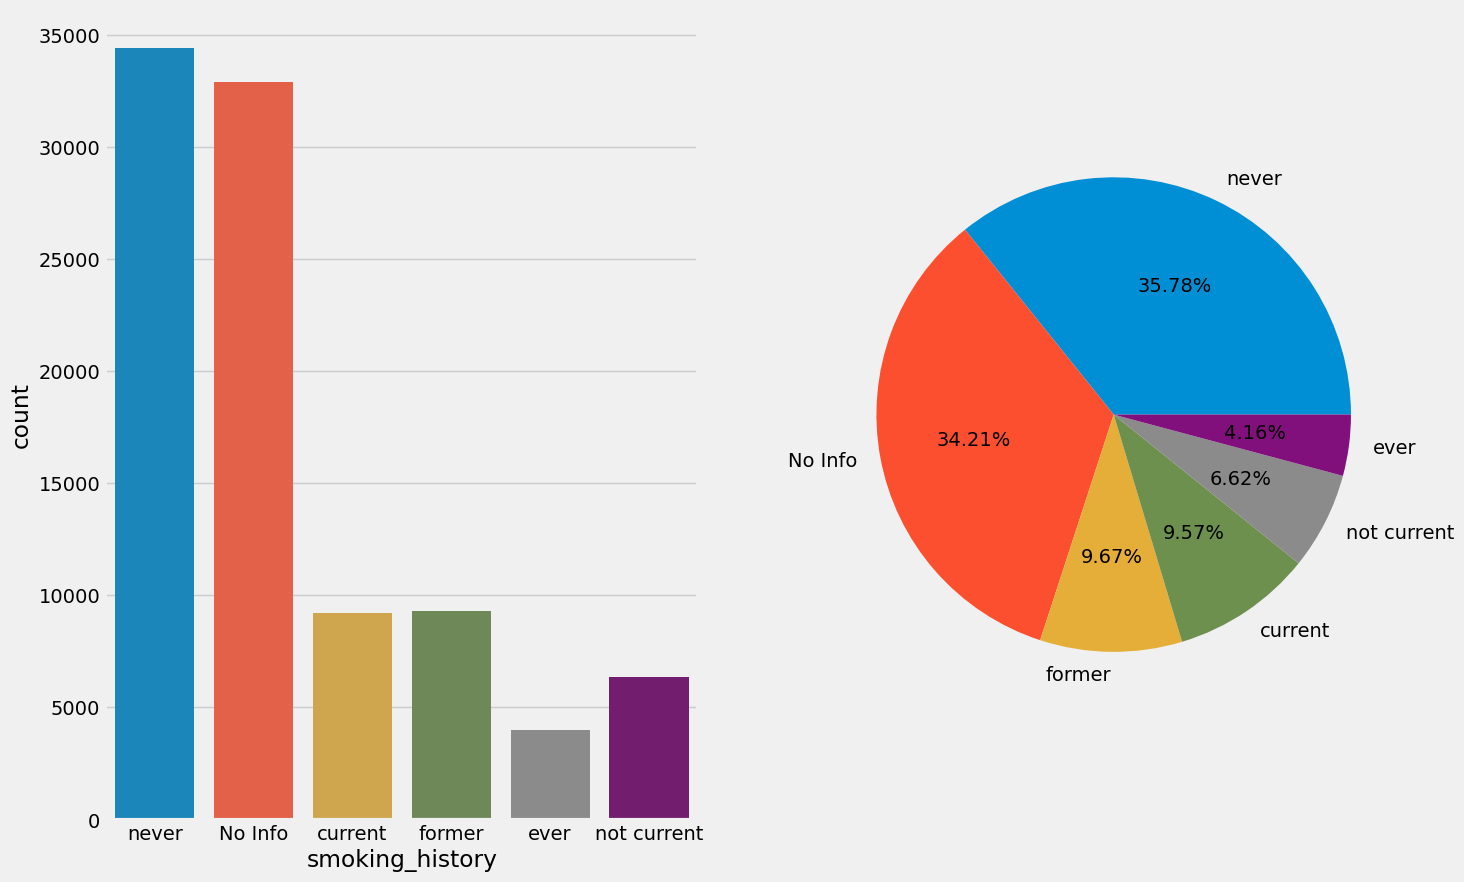

In [8]:
#Exploratory Data Analysis Part

labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = data['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x=data['smoking_history'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.2f%%')

plt.savefig('Image')
plt.show()

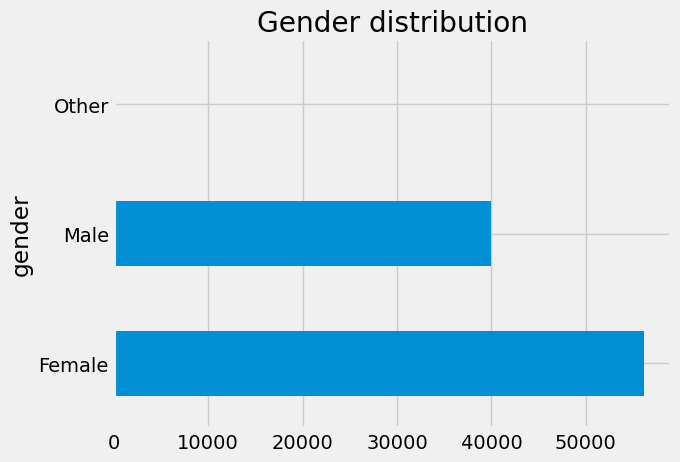

In [9]:
data["gender"].value_counts().plot.barh().set_title("Gender distribution");

In [10]:
count = data['gender'].value_counts()
print(count)

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


In [11]:
data.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [12]:
#Data Encoding Section
print(data["smoking_history"].unique())
print(data["gender"].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']
['Female' 'Male' 'Other']


In [13]:
data['gender'].replace(['Male', 'Female','Other'], [1,0,2], inplace=True)
data['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,
'not current': 6, 'ever': 7}, inplace=True)
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,0,36.0,0,0,4,23.45,5.0,155,0
4,1,76.0,1,1,4,20.14,4.8,155,0


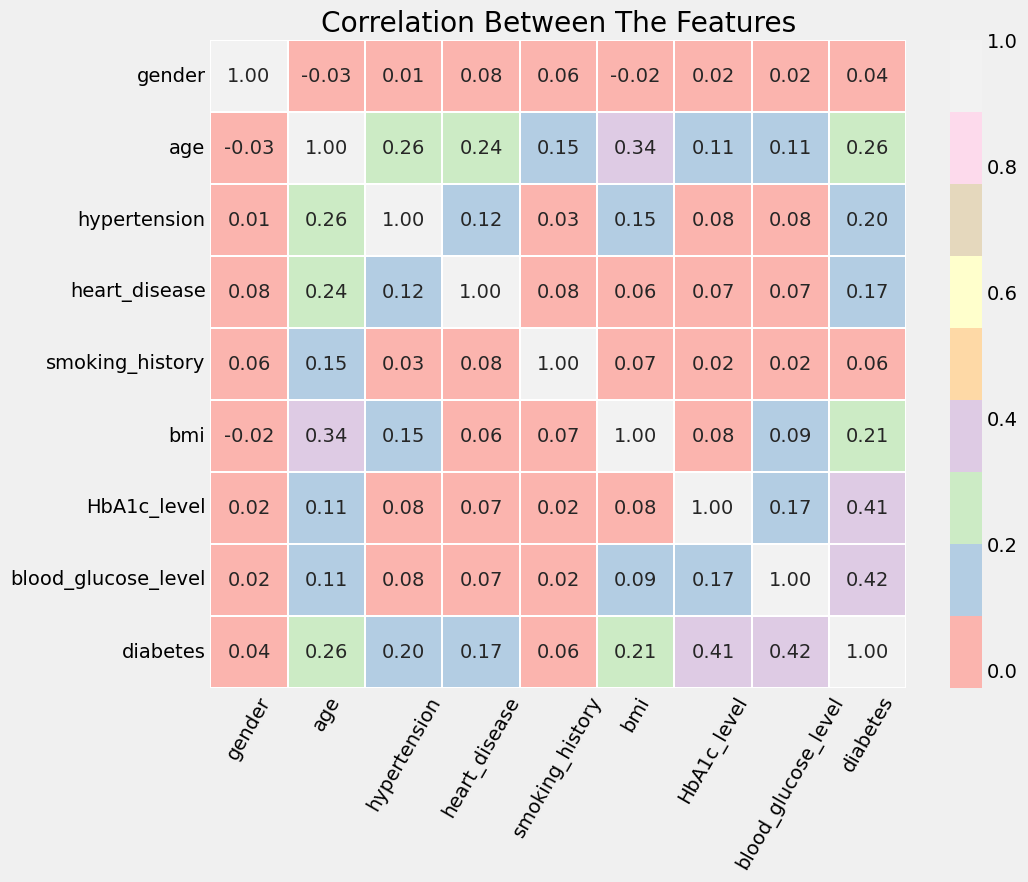

In [14]:
#Heat Map for Correlation Between the Features
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()

In [15]:
#Splitting Data to test and train
from sklearn.model_selection import train_test_split
X = data.drop("diabetes", axis=1) # Features
y = data.diabetes # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

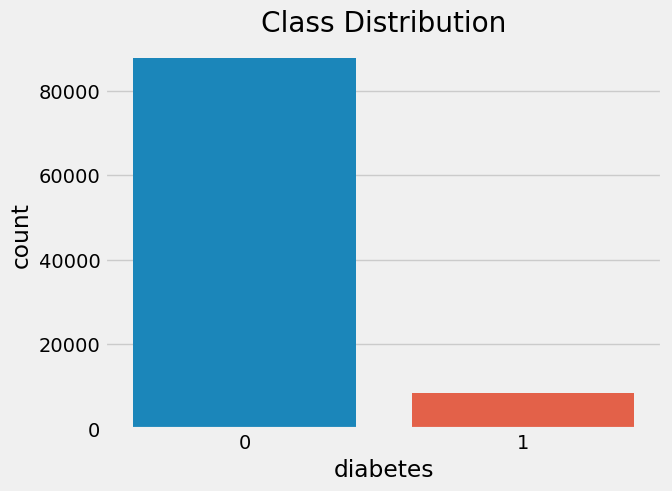

In [16]:
#Balancing Control
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [17]:
# Over Sampling and Under Sampling for Balancing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

from imblearn.pipeline import Pipeline

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

In [18]:
#Cross Validation - Optional
#from sklearn.model_selection import cross_validate, ShuffleSplit
#cv = cross_validate(RandomForestClassifier(), X_smote, y_smote , cv=10, n_jobs=-1, return_train_score=True)

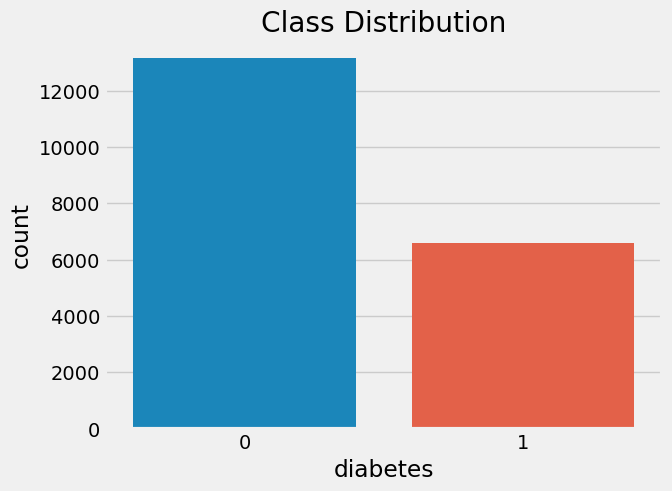

In [19]:
#Checking Balance again
sns.countplot(x=y_smote)
plt.title("Class Distribution")
plt.show()

In [20]:
#LOGISTIC REGRESSION predicting values
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
logreg = LogisticRegression()
logreg.fit(X_smote,y_smote)
logpred = logreg.predict(X_test)
accuracy_score(logpred , y_test)
print('F1-score% =', f1_score(y_test, logpred, average='macro')*100, '|', 
      'Accuracy% =', accuracy_score(y_test, logpred)*100)

F1-score% = 78.6438350245985 | Accuracy% = 91.45068020135623


In [21]:
#DECISION TREE predicting values
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
dtree = DecisionTreeClassifier()
dtree.fit(X_smote,y_smote)
dtpred=dtree.predict(X_test)
accuracy_score(dtpred,y_test)
print('F1-score% =', f1_score(y_test, dtpred, average='macro')*100, '|',
      'Accuracy% =', accuracy_score(y_test, dtpred)*100)

F1-score% = 77.54552209172209 | Accuracy% = 90.4314182302284


In [22]:
#RANDOM FOREST predicting values
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
rforest = RandomForestClassifier()
rforest.fit(X_smote,y_smote)
rfpred=rforest.predict(X_test)
accuracy_score(rfpred,y_test)
print('F1-score% =', f1_score(y_test, rfpred, average='macro')*100, '|',
      'Accuracy% =', accuracy_score(y_test, rfpred)*100)

F1-score% = 83.26211826269778 | Accuracy% = 93.70137704372425


In [23]:
#Confusion Matrix
pd.crosstab(y_test, rfpred, rownames=['Actual'], 
            colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,20753,1126,21879
1,388,1770,2158
All,21141,2896,24037


In [ ]:
#Creating a Interface of our program
Gender = input('Please enter male or female : ')
Age = input('Please enter your age : ')
Hypertansion = input('Do you have hypertension? Please enter 1 if yes, 0 otherwise : ')
Hearth_Disease = input('Do you have hearth disease? Please enter 1 if yes, 0 otherwise. : ')
smoking_history = input('Please enter your smoking history? : ')
Bmi = input('Please enter your Body Mass Index ? : ')
HbA1c_level = input('Please enter your HbA1c level ? : ')
blood_glucose_level = input('Please enter your blood glucose level? : ')

if Gender == 'male':
    Gender = 1
elif Gender == 'female':
    Gender = 0
else:
    Gender = 2
    
if smoking_history == 'never':
    smoking_history = 2
elif smoking_history == 'No Info':
    smoking_history = 3
elif smoking_history == 'current':
    smoking_history = 4
elif smoking_history == 'former':
    smoking_history = 5
elif smoking_history == 'not current':
    smoking_history = 6
else:
    smoking_history = 7

new_data = [[Gender, Age, Hypertansion, Hearth_Disease, 
             smoking_history, Bmi, HbA1c_level, 
             blood_glucose_level]]
prediction_data = rforest.predict(new_data)
if prediction_data == 1:
     print('diabetes detected')
else: 
     print('diabetes not detected')